In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from aging.plotting import format_plots, figure, legend
from sklearn.decomposition import NMF
from tqdm.auto import tqdm
import colorcet as cc

In [2]:
format_plots()

In [3]:
def load_long_df(version=5):
    usage_mtx = pd.read_parquet(
        f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/longtogeny_males_clean.parquet"
    )
    return usage_mtx

In [4]:
df = load_long_df(version=5)
# df = df[df.index.get_level_values('age') < 600]
n_bins = 35
bins = pd.qcut(df.index.get_level_values('age'), n_bins, labels=False)
df['binned_age'] = bins

In [5]:
age_map = np.floor(df.reset_index().groupby('binned_age')['age'].mean())

In [6]:
df.groupby('mouse').count()[0]

mouse
01_01    67
01_02    61
01_03    55
01_04    64
02_01    68
02_02    67
02_03    56
02_04    52
03_01    68
03_02    65
03_03    40
03_04    59
04_01    66
04_02    64
04_03    55
04_04    60
Name: 0, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

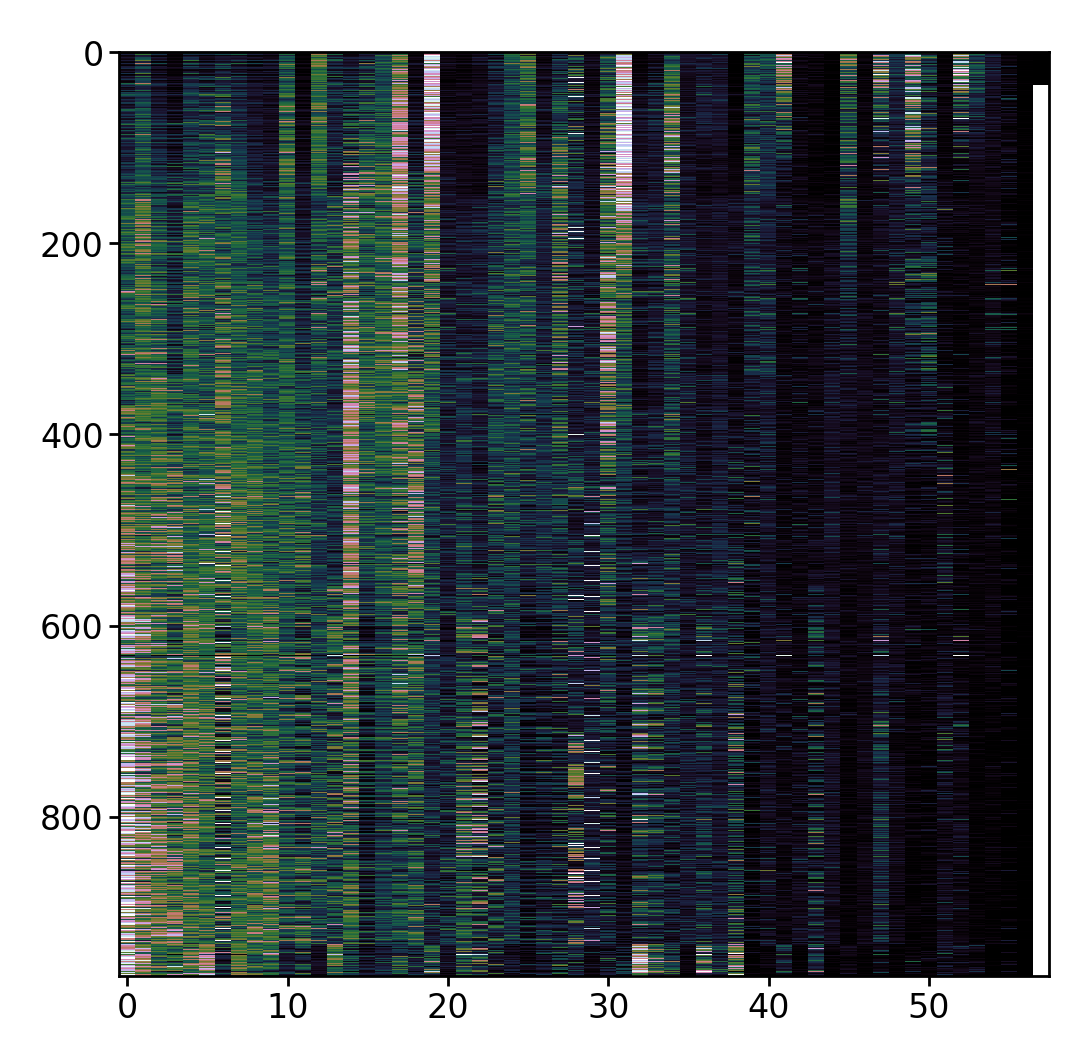

In [7]:
plt.imshow(df, aspect='auto', vmax=0.1, cmap='cubehelix', interpolation='none')

In [8]:
df.head()

relabeled_syllables                                                                          0  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.016502   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.007271   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.013241   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.001998   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.004022   

relabeled_syllables                                                                          1  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.025931   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.025691   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.035118   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.010490   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.012066   

relabeled_syllables                                                                          2  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.012730   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.015511   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.018423   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.003497   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.001508   

relabeled_syllables                                                                          3  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.002357   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.010179   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.002303   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.000500   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.001006   

relabeled_syllables                                                                          4  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.018859   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.031992   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.017271   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.002997   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.009553   

relabeled_syllables                                                                          5  \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.015087   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.025206   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.016120   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30

In [9]:
new_grouping = df.groupby(['mouse', 'binned_age']).mean()

In [10]:
new_grouping

relabeled_syllables        0         1         2         3         4   \
mouse binned_age                                                        
01_01 0              0.013332  0.022517  0.011087  0.003097  0.022145   
      1              0.013996  0.019579  0.012256  0.001602  0.024598   
      2              0.012585  0.026889  0.012075  0.003870  0.031365   
      3              0.016512  0.024375  0.017484  0.005827  0.025750   
      4              0.026332  0.025923  0.018056  0.008630  0.036318   
...                       ...       ...       ...       ...       ...   
04_04 30             0.023996  0.035994  0.047992  0.028169  0.042254   
      31             0.031368  0.032246  0.048160  0.027469  0.029620   
      32             0.036027  0.027792  0.042717  0.027792  0.024704   
      33             0.043159  0.042735  0.042814  0.033630  0.020426   
      34             0.072025  0.059753  0.031644  0.024325  0.037177   

relabeled_syllables        5         6         7         8         9   ...  \
mouse binned_age                                                       ...   
01_01 0              0.015535  0.021381  0.010379  0.007882  0.009752  ...   
      1              0.018408  0.017750  0.014940  0.010156  0.010089  ...   
      2              0.022044  0.026975  0.012973  0.011432  0.010480  ...   
      3              0.027297  0.025977  0.015324  0.010458  0.011076  ...   
      4              0.033790  0.026905  0.020882  0.020353  0.014450  ...   
...                       ...       ...       ...       ...       ...  ...   
04_04 30             0.028691  0.034950  0.031821  0.033385  0.048513  ...   
      31             0.026173  0.039511  0.029795  0.028624  0.035810  ...   
      32             0.031909  0.034483  0.031652  0.031652  0.039887  ...   
      33             0.046265  0.027875  0.041691  0.017193  0.032481  ...   
      34             0.081825  0.009116  0.025361  0.015133  0.020237  ...   

relabeled_syllables        47        48        49        50        51  \
mouse binned_age                                                        
01_01 0              0.017093  0.010974  0.029452  0.014361  0.000970   
      1              0.022375  0.011260  0.024226  0.007587  0.003476   
      2              0.012097  0.014218  0.021402  0.003916  0.001765   
      3              0.006668  0.013519  0.019900  0.011060  0.000606   
      4              0.005681  0.005776  0.017353  0.009990  0.002373   
...                       ...       ...       ...       ...       ...   
04_04 30             0.023474  0.011476  0.002087  0.003130  0.002087   
      31             0.018708  0.006458  0.003664  0.005375  0.004069   
      32             0.011065  0.008235  0.003603  0.002831  0.005661   
      33             0.006169  0.006669  0.002714  0.002939  0.003755   
      34             0.006730  0.000675  0.002034  0.001711  0.004791   

relabeled_syllables        52        53        54        55        56  
mouse binned_age                                                       
01_01 0              0.030153  0.021443  0.007445  0.009607  0.000157  
      1              0.029371  0.009687  0.004814  0.002093  0.000461  
      2              0.008312  0.005426  0.007338  0.005721  0.000418  
      3              0.002220  0.003615  0.004866  0.006269  0.000403  
      4              0.001248  0.002326  0.004464  0.009112  0.000000  
...                       ...       ...       ...       ...       ...  
04_04 30             0.004695  0.001565  0.004695  0.001043  0.000522  
      31             0.003011  0.002476  0.003229  0.001238  0.000255  
      32             0.002316  0.001544  0.001801  0.002831  0.000772  
      33             0.002548  0.001599  0.002656  0.003139  0.000000  
      34             0.002994  0.000333  0.000342  0.002053  0.000000  

[530 rows x 57 columns]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

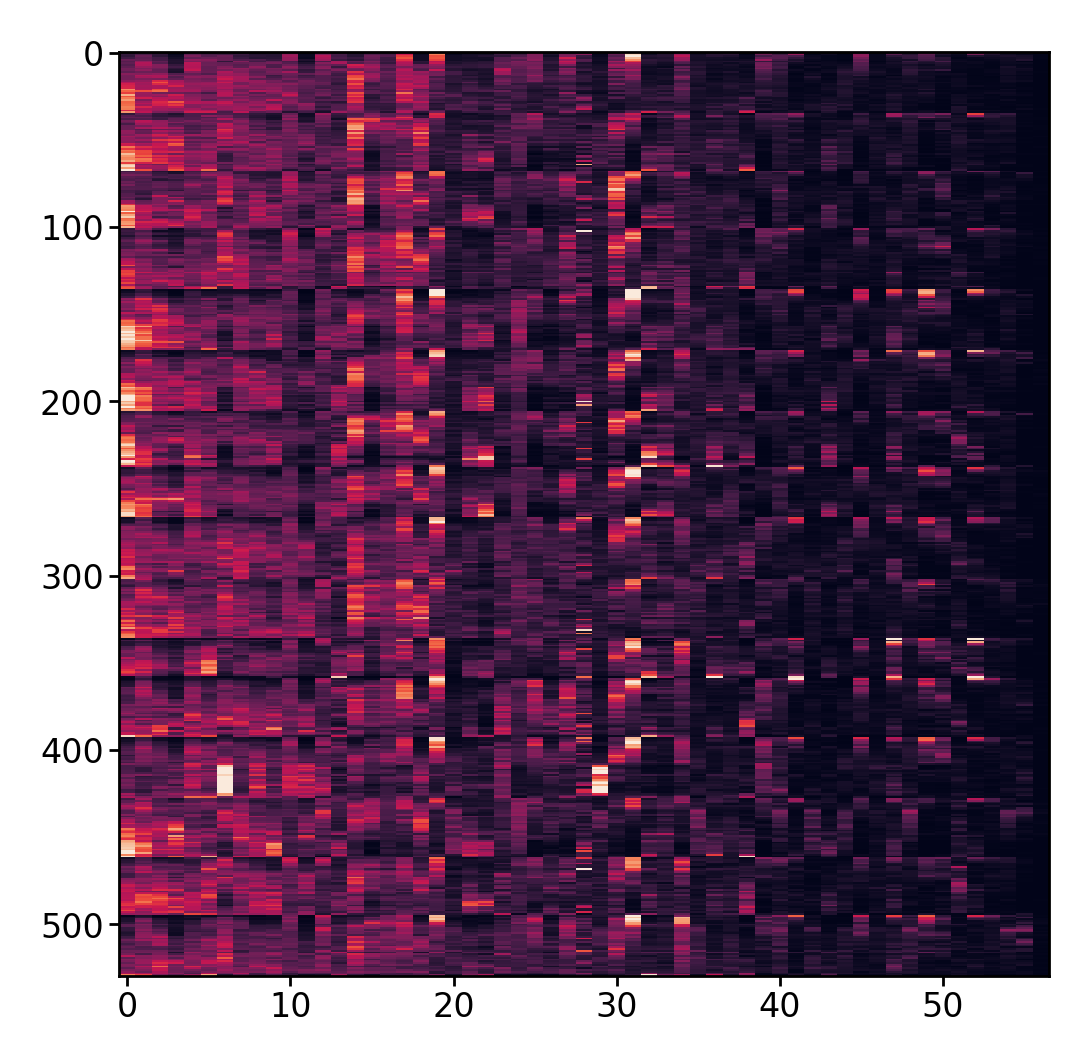

In [11]:
plt.imshow(new_grouping, aspect='auto', interpolation='none', vmax=0.1)

In [12]:
agg = []
for mouse, x in new_grouping.groupby('mouse'):
    x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
    x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
    agg.append(x)
agg = pd.concat(agg)

In [13]:
arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

In [14]:
in_data = np.concatenate(arr, axis=1).T

In [15]:
errs = []
for i in range(1, 10):
    nmf = NMF(n_components=i, max_iter=500)
    nmf.fit(in_data)
    errs.append(nmf.reconstruction_err_)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

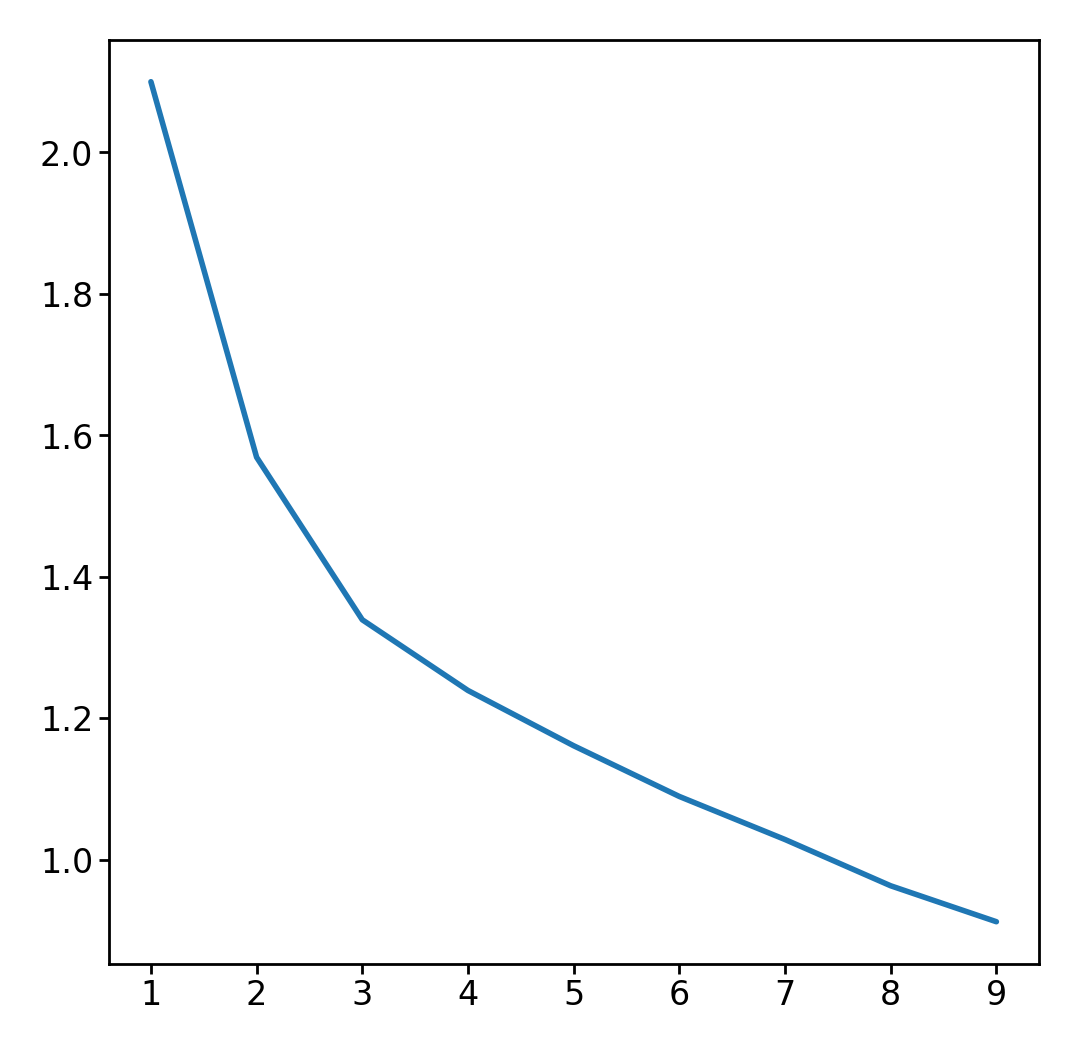

In [16]:
plt.plot(range(1, 10), errs)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

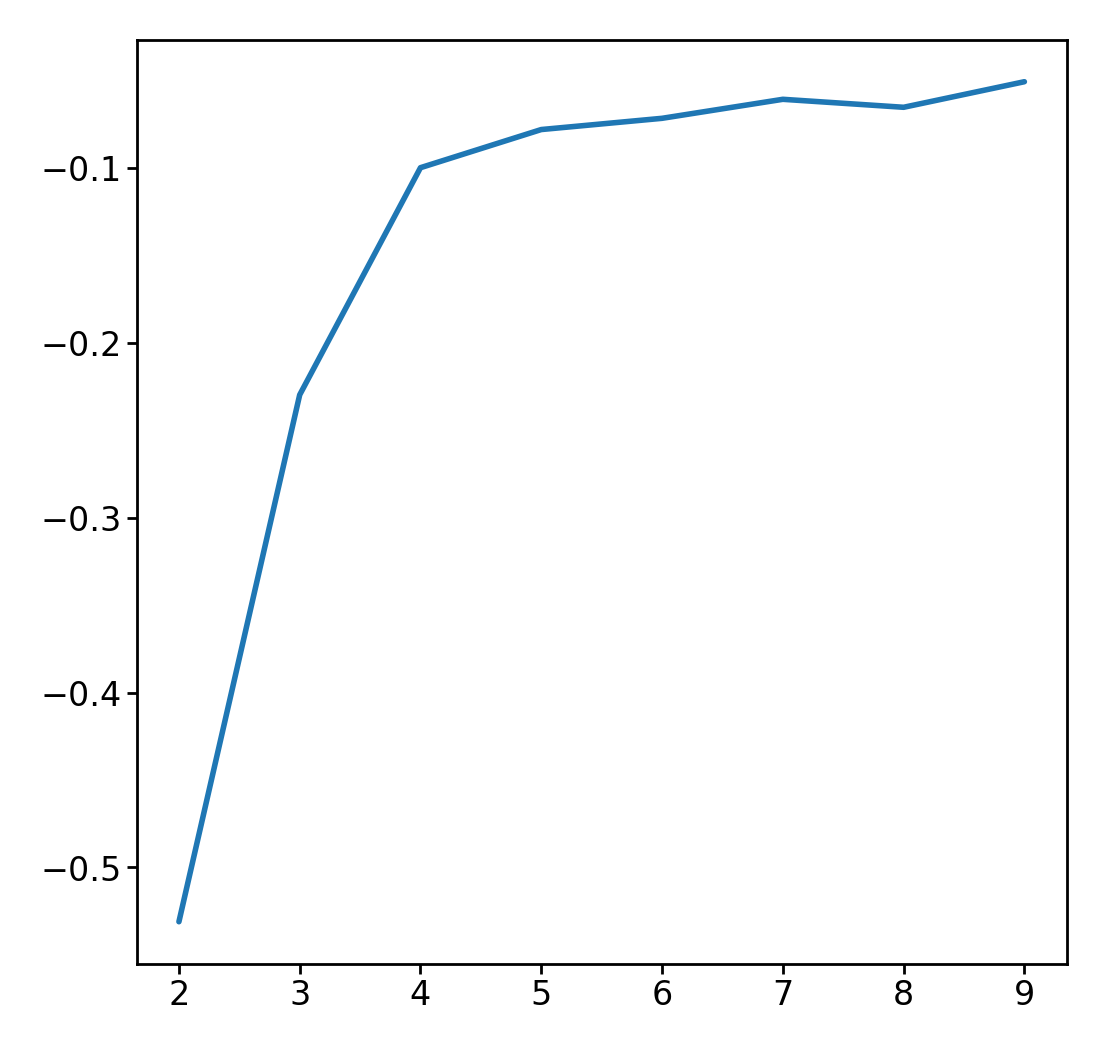

In [17]:
plt.plot(range(2, 10), np.diff(errs))

In [19]:
nmf = NMF(n_components=3, max_iter=1000)
nmf.fit(in_data)


NMF(max_iter=1000, n_components=3)

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

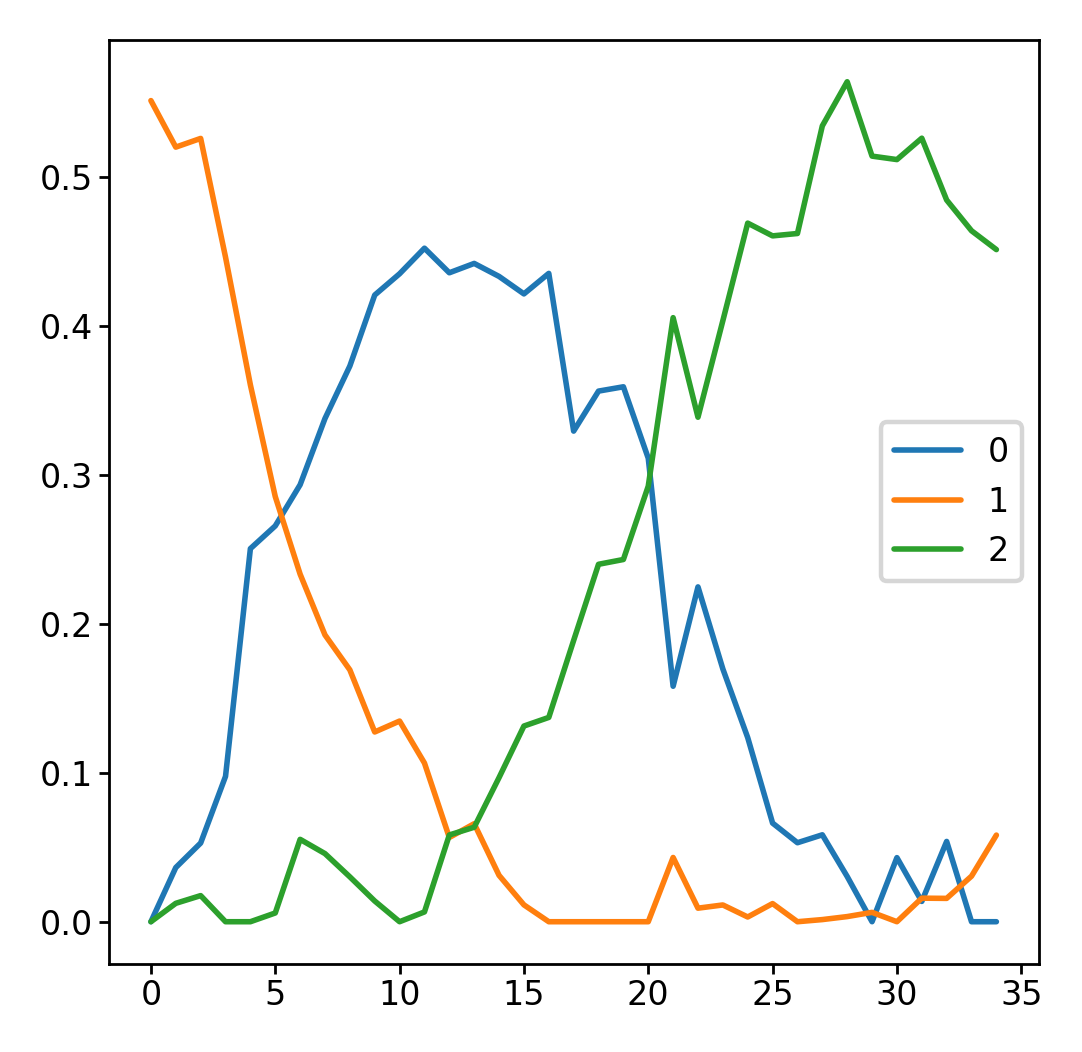

In [20]:
x = pd.DataFrame(nmf.components_.T)
x.plot()

## Resample mice to get some errorbars on NMF components

In [21]:
mice = df.index.levels[1]

In [22]:
n_mice = 13
n_shuffs = 100
n_components = 3

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

to_plt['age'] = to_plt['index'].map(age_map) / 7

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

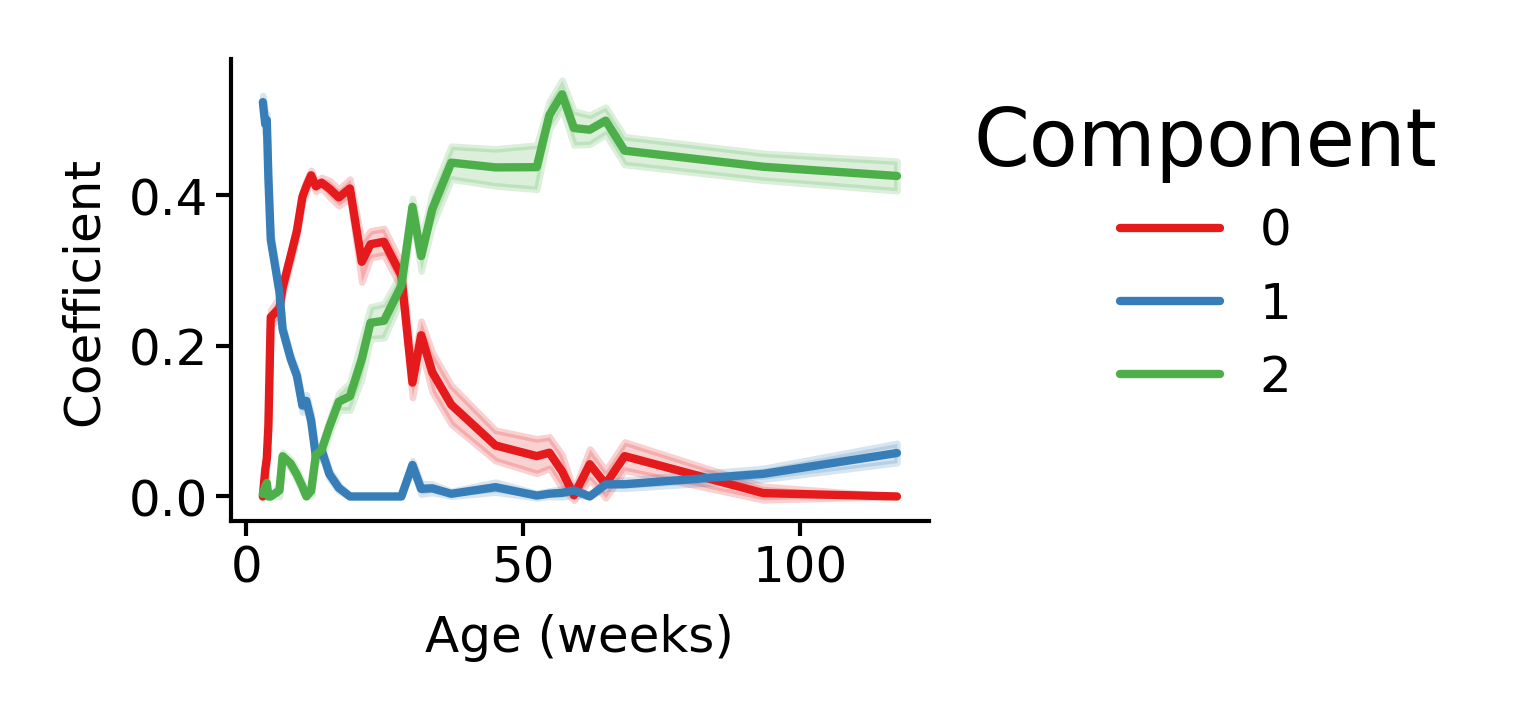

In [24]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="age", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Age (weeks)", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()

## Try more components

In [285]:
n_mice = 13
n_shuffs = 250
n_components = 5

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/250 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 7

In [286]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

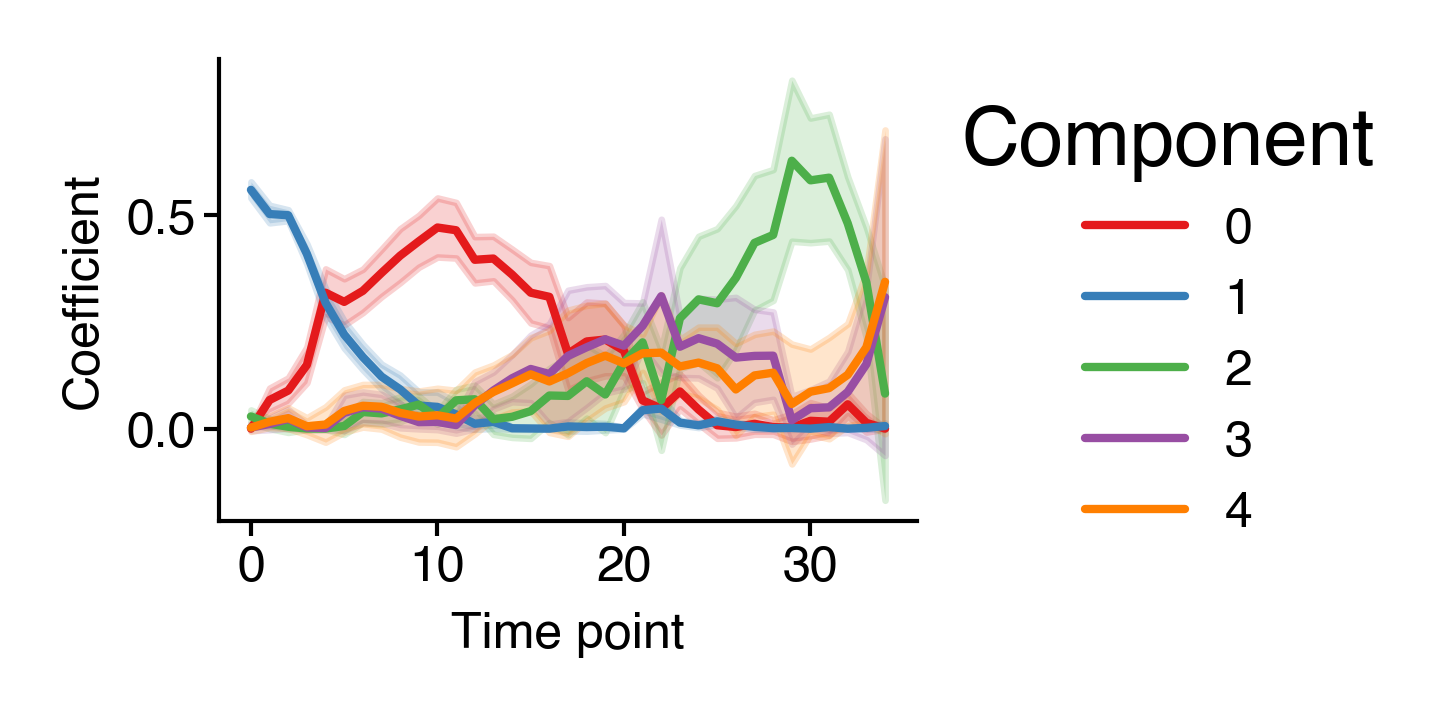

In [287]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="index", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Time point", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()

In [301]:
n_mice = 13
n_shuffs = 250
n_components = 4

np.random.seed(0)

components = []
for i in tqdm(range(n_shuffs)):
    choices = np.random.choice(mice, size=n_mice, replace=False)

    agg = []
    for mouse, x in new_grouping.loc[choices].groupby('mouse'):
        x = x.droplevel(0).reindex(np.arange(n_bins), fill_value=0)
        x.index = pd.MultiIndex.from_arrays([pd.Index([mouse] * len(x), name='mouse'), x.index])
        agg.append(x)
    agg = pd.concat(agg)

    arr = np.array([x.to_numpy() for _, x in agg.groupby('mouse')])

    in_data = np.concatenate(arr, axis=1).T

    nmf = NMF(n_components=n_components, max_iter=750, random_state=0)
    nmf.fit(in_data)
    components.append(nmf.components_.T)

component_df = []
for i, comp in enumerate(components):
    _df = pd.DataFrame(comp)
    _df['iteration'] = i
    component_df.append(_df)
component_df = pd.concat(component_df)

  0%|          | 0/250 [00:00<?, ?it/s]

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 750 reached. Increase it to improve convergence.
  warnings.warn(


In [302]:
to_plt = component_df.reset_index().melt(id_vars=['iteration', 'index'])

to_plt['age'] = to_plt['index'].map(age_map)

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

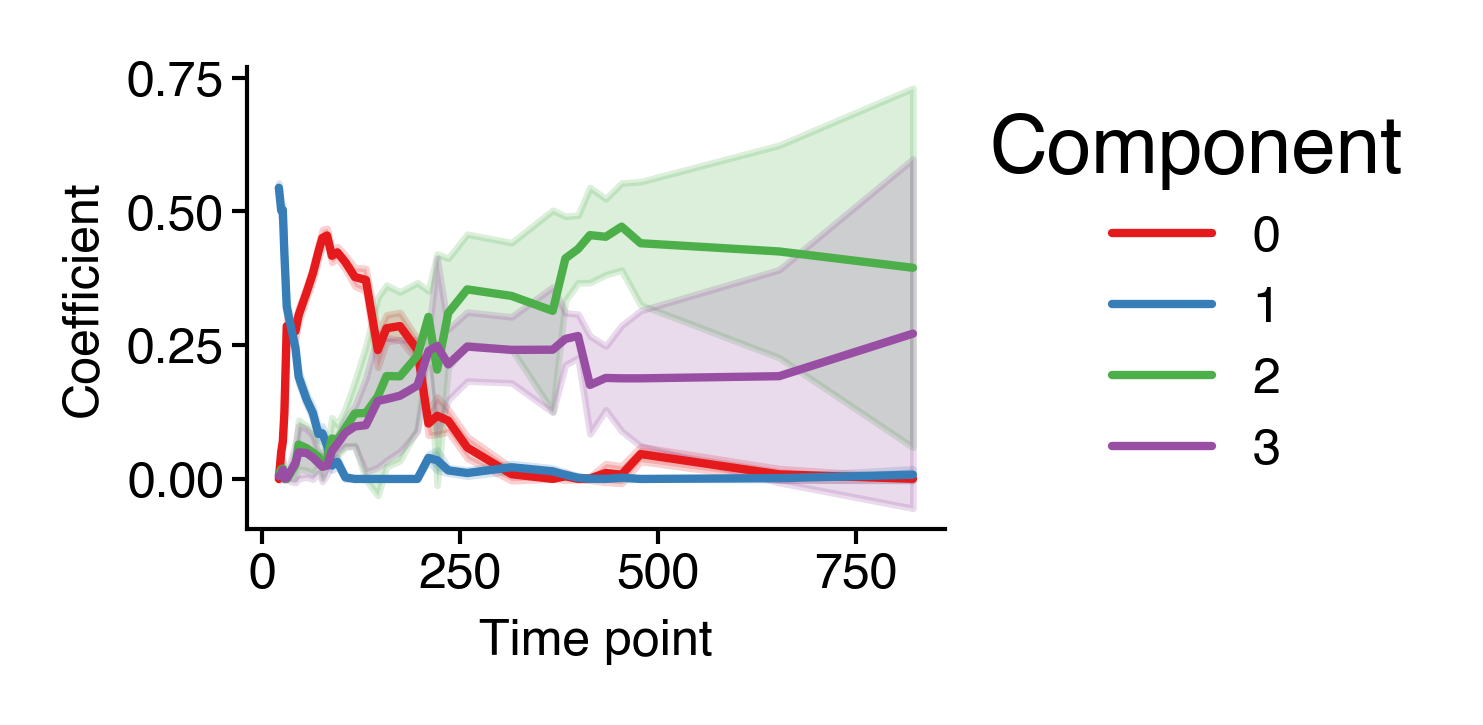

In [303]:
fig = figure(1.5, 1)
ax = sns.lineplot(
    data=to_plt, x="age", y="value", hue="variable", errorbar="sd", palette="Set1"
)
ax.set(ylim=(None, None), xlabel="Time point", ylabel="Coefficient")
legend(ax, title="Component")
sns.despine()